<a href="https://colab.research.google.com/github/hekmat-ashqer/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

by Hikmat Ashqar

# Project Overview


this project will be a sales prediction for food items sold at various stores. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.


# Parts 1 & 2


our task is to use Pandas to load in the data and start exploring and cleaning it. 



## Helper Functions

In [1]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#evaluate_classification_combined(model_pipe, X_train, y_train, X_test, y_test)
#evaluate_classification(model_pipe,X_train, y_train, X_test, y_test,output_dict=True)
#plot_testing_threshold(model_pipe, X_train, y_train, X_test, y_test)
#evaluate_regression(model_pipe,X_train, y_train, X_test, y_test,output_dict=True)
#evaluate_model(model, X_train_tf, y_train, X_test_tf, y_test)
#ax = plot_cv_results(gs)
#ax.set_title(f'Change in {gs.scoring} Over C-Values for L1 Regularitzation');

In [2]:
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOTS
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  # Adjust layout and show figure
  fig.tight_layout()
  plt.show()
  # Return dictionary of classification_report
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict

def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict


def roc_fun(model_pipe, X_train, y_train, X_test, y_test):

 # roc_auc
  y_pred_proba_train = model_pipe.predict_proba(X_train)
  y_pred_proba_test = model_pipe.predict_proba(X_test)
  train_roc_auc = roc_auc_score(y_train, y_pred_proba_train[:,1])
  test_roc_auc = roc_auc_score(y_test, y_pred_proba_test[:,1])

  print(f'Training ROC AUC: {train_roc_auc:.2f}')
  print(f'Test ROC AUC: {test_roc_auc:.2f}')
  print()
  # Make figure for training and test conf matrix
  fig, axes = plt.subplots(ncols=2, figsize=(8,4))

  # Visualize the ROC curve
  RocCurveDisplay.from_estimator(model_pipe, X_train, y_train, ax=axes[0])
  axes[0].plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
  axes[0].legend();
  axes[0].set_title("Training Data")

  RocCurveDisplay.from_estimator(model_pipe, X_test, y_test, ax=axes[1])
  axes[1].plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
  axes[1].legend();
  axes[1].set_title("Test Data")

  fig.suptitle('ROC Curves')
  fig.tight_layout()
  plt.show()


def evaluate_classification_combined(model, X_train, y_train, X_test, y_test,
                         figsize=(8,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )


  roc_fun(model, X_train, y_train, X_test, y_test)


  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict


def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics

def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)

  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )

  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)



In [3]:
def convert_probs_to_preds(probabilities, threshold, pos_class=1):
  """Converts float value probabilities into int value predictions.
  If the probability of class 1 is greater than the threshold, the prediction is 1
  Otherwise the prediction is 0
  pos_class determines the index of the positive class in the array of probabilies"""
  predictions = [1 if prob[pos_class] > threshold else 0 for prob in probabilities]
  return predictions
# Convert the model's probability predictions to class predictions
# With a decision threshold of .2
#test_preds = convert_probs_to_preds(test_probs, .25)
#test_preds[:5]
#ConfusionMatrixDisplay.from_predictions(y_test, test_preds, normalize='true', cmap='Greens')

def plot_testing_threshold(model_pipe, X_train, y_train, X_test, y_test):


  test_probs = model_pipe.predict_proba(X_test)

  # Create an array of float values between 0 and 1 with a step size of .05
  thresholds = np.arange(start=0, stop=1.05, step=.05)
  # Create empty recall and precision lists
  recalls = []
  precisions = []
  accuracies = []
  # Iterate over thresholds
  for thresh in thresholds:
    # Convert probabilities to predictions according to each threshold
    preds = convert_probs_to_preds(test_probs, thresh)
    # Record the recall and precision for predictions at that threshold
    recalls.append(recall_score(y_test, preds))
    precisions.append(precision_score(y_test, preds))
    accuracies.append(accuracy_score(y_test, preds))

  # Plot precisions and recalls for each probability
  plt.figure(figsize=(15,5))
  plt.plot(thresholds, recalls, label='Recall')
  plt.plot(thresholds, precisions, label='Precision')
  plt.plot(thresholds, accuracies, label='Accuracy')
  plt.legend()
  plt.title('Precision, Recall, and Accuracy Scores Across Decision Thresholds')
  plt.xlabel('Decision Thresholds')
  plt.ylabel('Score')
  plt.grid()
  plt.xticks(thresholds)
  plt.show()


  # We will be reproducing thie plot many times, so let's turn it into a short-term function
def plot_cv_results(gs, param_name='param_logisticregression__C', logx = True):
    # Making a dataframe with cv_results_
  cv_results = pd.DataFrame(gs.cv_results_)
  # Save the train/test scores with values for C
  scores = cv_results[[param_name,'mean_train_score','mean_test_score']]
  scores = scores.set_index(param_name)
  ## Plot the training vs test scores vs. C
  ax = scores.plot(y=['mean_test_score','mean_train_score'],
              style='o-',logx=logx)
  ax.set(ylabel=gs.scoring)
  print(scores['mean_test_score'])
  return ax

In [4]:

def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):

  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}")

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax



# Updating function
def plot_categorical_vs_target(df, x, y, figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None, target_type='reg'):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)
  # REGRESSION-TARGET PLOT
  if target_type=='reg': #Added if statement here
    # Barplot
    sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
                linewidth=1, edgecolor='black', errorbar=None)
    # Boxplot
    sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                  order=order, hue_order=order, legend=False,
                  edgecolor='white', linewidth=0.5,
                  size=3,zorder=0)
  # CLASSIFICATION-TARGET PLOT # This is the new code for the classification task
  elif target_type=='class':
    ax = sns.histplot(data=temp_df, hue=y, x=x, stat='percent',  multiple='fill')
  # Rotate xlabels
  ax.set_xticks(ax.get_xticks()) # Added this to prevent a bug
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  return fig, ax




def explore_numeric(df, x, figsize=(6,5) ):
# Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])
  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])
  ## Adding a title
  axes[0].set_title(f"Column: {x}")
  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()
  ## Print message with info on the count and % of null values
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100

  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")


# Updating the function
def plot_numeric_vs_target(df, x, y, figsize=(6,4),
                           target_type='reg', estimator='mean',
                           errorbar='ci',sorted=False,ascending=False,
                           **kwargs): # kwargs for sns.regplot

  nulls = df[[x,y]].isna().sum()
  if nulls.sum()>0:
    print(f"- Excluding {nulls.sum()} NaN's")
    # print(nulls)
    temp_df = df.dropna(subset=[x,y,])
  else:
    temp_df = df
  # Create the figure
  fig, ax = plt.subplots(figsize=figsize)

  # REGRESSION-TARGET PLOT
  if 'reg' in target_type:
    # Calculate the correlation
    corr = df[[x,y]].corr().round(2)
    r = corr.loc[x,y]
    # Plot the data
    scatter_kws={'ec':'white','lw':1,'alpha':0.8}
    sns.regplot(data=temp_df, x=x, y=y, ax=ax, scatter_kws=scatter_kws, **kwargs)
    # Included the new argument within the sns.regplot function
    ## Add the title with the correlation
    ax.set_title(f"{x} vs. {y} (r = {r})")

  # CLASSIFICATION-TARGET PLOT
  elif 'class' in target_type:

    # Sort the groups by median/mean
    if sorted == True:

      if estimator == 'median':
        group_vals = temp_df.groupby(y)[x].median()
      elif estimator =='mean':
        group_vals = temp_df.groupby(y)[x].mean()

      ## Sort values
      group_vals = group_vals.sort_values(ascending=ascending)
      order = group_vals.index

    else:
      # Set order to None if not calcualted
      order = None


    # Left Subplot (barplot)
    sns.barplot(data=temp_df, x=y, y=x, order=order,  estimator=estimator,
                errorbar=errorbar, ax=ax, **kwargs)

    # Add title
    ax.set_title(f"{x} vs. {y}")

    # rotate xaxis labels
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


  # Final Adjustments & return
  fig.tight_layout()
  fig.show()
  return fig, ax



def plot_multi_numeric_vs_target(df, xs, y, figsize=(6,4), target_type='reg',
                           estimator='mean', errorbar='ci', sorted=False,
                           ascending=False, **kwargs):
    nulls = df[xs + [y]].isna().sum()
    if nulls.sum() > 0:
        print(f"- Excluding {nulls.sum()} NaN's")
        temp_df = df.dropna(subset=xs + [y])
    else:
        temp_df = df

    # Calculate grid size for subplots
    n = len(xs)
    cols = int(np.ceil(np.sqrt(n)))
    rows = int(np.ceil(n / cols))

    # Create the figure with subplots
    fig, axs = plt.subplots(rows, cols, figsize=(figsize[0]*cols, figsize[1]*rows))
    axs = axs.flatten() # Flatten in case of a single row/column to simplify indexing

    for i, x in enumerate(xs):
        ax = axs[i]
        if 'reg' in target_type:
            # Calculate the correlation
            corr = temp_df[[x, y]].corr().round(2)
            r = corr.loc[x, y]
            # Plot the data
            scatter_kws = {'ec': 'white', 'lw': 1, 'alpha': 0.8}
            sns.regplot(data=temp_df, x=x, y=y, ax=ax, scatter_kws=scatter_kws, **kwargs)
            ax.set_title(f"{x} vs. {y} (r = {r})")
        elif 'class' in target_type:
            # Sorting and ordering logic remains the same
            if sorted:
                if estimator == 'median':
                    group_vals = temp_df.groupby(y)[x].median()
                elif estimator == 'mean':
                    group_vals = temp_df.groupby(y)[x].mean()
                group_vals = group_vals.sort_values(ascending=ascending)
                order = group_vals.index
            else:
                order = None
            sns.barplot(data=temp_df, x=y, y=x, order=order, estimator=estimator,
                        errorbar=errorbar, ax=ax, **kwargs)
            ax.set_title(f"{x} vs. {y}")
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

        if i >= n: # If we have more subplots than features, hide the extra axes
            ax.set_visible(False)

    # Final Adjustments & return
    plt.tight_layout()
    plt.show()
    return fig, axs

In [5]:

def combined_classification_metrics_old(model_pipe, X_train, y_train, X_test, y_test):
    # Get predictions
    y_pred_train = model_pipe.predict(X_train)
    y_pred_test = model_pipe.predict(X_test)

    # Print Classification Metrics for Training Data
    print('-' * 70)
    print('Classification Metrics: Training Data')
    print('-' * 70)
    print(classification_report(y_train, y_pred_train))

    # Print Classification Metrics for Test Data
    print('-' * 70)
    print('Classification Metrics: Test Data')
    print('-' * 70)
    print(classification_report(y_test, y_pred_test))

    # Confusion Matrices
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

    # Confusion Matrix for Training Data
    train_conf_matrix = confusion_matrix(y_train, y_pred_train)
    train_conf_matrix_normalized = train_conf_matrix.astype('float') / train_conf_matrix.sum(axis=1)[:, np.newaxis]
    ConfusionMatrixDisplay(train_conf_matrix_normalized, display_labels=model_pipe.classes_).plot(ax=axes[0, 0], cmap='Reds')
    axes[0, 0].set_title('Normalized Confusion Matrix - Training Data')

    # Confusion Matrix for Test Data
    test_conf_matrix = confusion_matrix(y_test, y_pred_test)
    test_conf_matrix_normalized = test_conf_matrix.astype('float') / test_conf_matrix.sum(axis=1)[:, np.newaxis]
    ConfusionMatrixDisplay(test_conf_matrix_normalized, display_labels=model_pipe.classes_).plot(ax=axes[0, 1], cmap='Greys')
    axes[0, 1].set_title('Normalized Confusion Matrix - Test Data')

    # ROC Curves
    RocCurveDisplay.from_estimator(model_pipe, X_train, y_train, ax=axes[1, 0])
    axes[1, 0].plot([0, 1], [0, 1], ls='--', label='Baseline (AUC = 0.5)')
    axes[1, 0].legend()
    axes[1, 0].set_title("ROC Curve - Training Data")

    RocCurveDisplay.from_estimator(model_pipe, X_test, y_test, ax=axes[1, 1])
    axes[1, 1].plot([0, 1], [0, 1], ls='--', label='Baseline (AUC = 0.5)')
    axes[1, 1].legend()
    axes[1, 1].set_title("ROC Curve - Test Data")

    # Calculate and display AUC scores
    if y_train.ndim > 1:
        y_train = np.argmax(y_train, axis=1)

    if y_test.ndim > 1:
        y_test = np.argmax(y_test, axis=1)

    train_auc = roc_auc_score(y_train, model_pipe.predict_proba(X_train)[:, 1])
    test_auc = roc_auc_score(y_test, model_pipe.predict_proba(X_test)[:, 1])

    print('-' * 70)
    print(f'Training AUC: {train_auc}')
    print(f'Testing AUC: {test_auc}')

    plt.tight_layout()
    plt.show()


def evaluate_model(model_pipe, X_train, y_train, X_test, y_test):
  # Get predictions
  y_pred_train = model_pipe.predict(X_train)
  y_pred_test = model_pipe.predict(X_test)

  # Accuracy
  train_accuracy = accuracy_score(y_train, y_pred_train)
  test_accuracy = accuracy_score(y_test, y_pred_test)

  print(f'Training accuracy: {train_accuracy:.2f}')
  print(f'Test accuracy: {test_accuracy:.2f}')
  print()

  # Precision
  train_precision = precision_score(y_train, y_pred_train)
  test_precision = precision_score(y_test, y_pred_test)

  print(f'Training precision: {train_precision:.2f}')
  print(f'Test precision: {test_precision:.2f}')
  print()


  # Recall
  train_recall = recall_score(y_train, y_pred_train)
  test_recall = recall_score(y_test, y_pred_test)

  print(f'Training Recall: {train_recall:.2f}')
  print(f'Test Recall: {test_recall:.2f}')
  print()


  # roc_auc
  y_pred_proba_train = model_pipe.predict_proba(X_train)
  y_pred_proba_test = model_pipe.predict_proba(X_test)
  train_roc_auc = roc_auc_score(y_train, y_pred_proba_train[:,1])
  test_roc_auc = roc_auc_score(y_test, y_pred_proba_test[:,1])

  print(f'Training ROC AUC: {train_roc_auc:.2f}')
  print(f'Test ROC AUC: {test_roc_auc:.2f}')
  print()

  # Make figure for training and test conf matrix
  fig, axes = plt.subplots(ncols=2, figsize=(8,4))

  ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train, normalize='true',
                                          cmap='Greens', ax=axes[0])
  axes[0].set_title("Training Data")
  ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, normalize='true',
                                          cmap='Reds', ax=axes[1])
  axes[1].set_title("Test Data")

  fig.suptitle("Confusion Matrices")
  fig.tight_layout()
  plt.show()



  # Make figure for training and test conf matrix
  fig, axes = plt.subplots(ncols=2, figsize=(8,4))

  # Visualize the ROC curve
  RocCurveDisplay.from_estimator(model_pipe, X_train, y_train, ax=axes[0])
  axes[0].plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
  axes[0].legend();
  axes[0].set_title("Training Data")

  RocCurveDisplay.from_estimator(model_pipe, X_test, y_test, ax=axes[1])
  axes[1].plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
  axes[1].legend();
  axes[1].set_title("Test Data")

  fig.suptitle('ROC Curves')
  fig.tight_layout()
  plt.show()

**Part** 2:

1) How many rows and columns?

2) What are the datatypes of each variable?

3) Are there duplicates? If so, drop any duplicates.

4) Identify missing values.

5) Address the missing values by using a placeholder value.

6) Confirm that there are no missing values after addressing them.

7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

### Data Dictionary

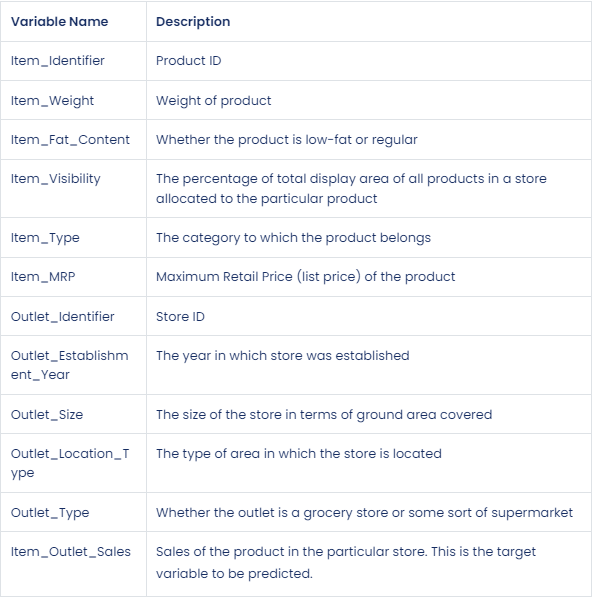

### Imports

In [6]:
# Import required packages


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np




## Load and Inspect Data


In [7]:
# Save the filepath and load the data as "df_sales"

# path = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'

path = 'file:///C:/Users/hekmat.ashqar/Documents/GitHub/Prediction-of-Product-Sales/sales_predictions_2023.csv'
df = pd.read_csv(path)
df2 = df.copy()

In [8]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Data Cleaning


How many rows/columns:



In [10]:
df.shape

(8523, 12)

- There are 8523 rows and 12 columns

Checking the data types:





In [11]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

 - the Outlet_Identifier is showing as an object type column and should be either a float64 or an int64 type column as it is store id in the dictionary .

 - All other data types are as they should be.

### Duplicated Data


Checking for duplicated data:



In [12]:
df.duplicated().sum()

0

### Missing Values

Checking for missing values:




In [13]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


- There are 1463 missing values in the Item_Weight column.
- There are 2410 missing values in the Outlet_Size column.

In order to make informed decisions about how to handle missing data, we will do some additional EDA.

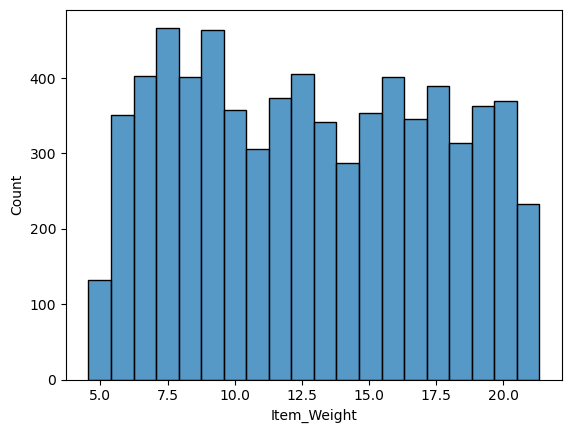

In [14]:
ax = sns.histplot(data = df, x = 'Item_Weight')


giving that data is normally distributed  we can  use the median or mean to Fill the empty values and we will use the mean as it is a measure of central tendency as there is no sparks and we want to keep using it so it will not be affected after filling empty data.


In [15]:
df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [16]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())
df['Item_Weight'].describe()


count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

In [17]:
df['Outlet_Size'].value_counts()


Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

fill in the missing values with the word Unknown so that the values will be filled in, but we will still be aware that those values are unknown

In [18]:
df['Outlet_Size'] = df['Outlet_Size'].fillna(value = 'Unknown')
df['Outlet_Size'].value_counts()


Medium     2793
Unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

Checking to make sure there is no more  empty values

In [19]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Inspecting Categorical Columns & Addressing Inconsistent Values

We will now use a filter to create a for loop that loops through all of the object type columns so that we can inspect them further.


In [20]:
data_types = df.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [21]:
for col in str_cols:
    print(f'- {col}:')
    print(df[col].value_counts(dropna=False))
    print("\n\n")

- Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



- Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



- Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64



- Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    9

After further investigation of the categorical columns, there are inconsistencies with spellings of the following categories in the Item_Fat_Content column

LF should be Low Fat

low fat should be Low Fat

reg should be Regular

In [22]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_rows', 50)
df['Item_Fat_Content'].value_counts()


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [23]:
Item_Fat_Content_map = {'LF':'Low Fat',
                        'low fat':'Low Fat',
                        'reg':'Regular'}

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(Item_Fat_Content_map)
df['Item_Fat_Content'].value_counts()


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### Fixing Data Types

 regarding Outlet_Identifier as it represent store ID it should be integer type and we can remove the OUT prefix

In [24]:
df['Outlet_Identifier'] = df['Outlet_Identifier'].str.replace('OUT', '')
df['Outlet_Identifier'] = df['Outlet_Identifier'].astype(int)
df['Outlet_Identifier']

0       49
1       18
2       49
3       10
4       13
        ..
8518    13
8519    45
8520    35
8521    18
8522    46
Name: Outlet_Identifier, Length: 8523, dtype: int32

**checking numerical data type**

In [25]:
num_cols = df.select_dtypes('number').columns
num_cols


Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [26]:
for col in num_cols:
    print(f'- {col}:')
    print(df[col].describe())
    print("\n\n")

- Item_Weight:
count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64



- Item_Visibility:
count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64



- Item_MRP:
count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64



- Outlet_Identifier:
count    8523.000000
mean       29.108765
std        13.927648
min        10.000000
25%        17.000000
50%        27.000000
75%        45.000000
max        49.000000
Name: Outlet_Identifier, dtype: float64



- Outlet_Establishment_Year:
count    8523.000000
mean     1997.831867
std         8.371760
min      1985.

In [27]:
df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,29.11,1997.83,2181.29
std,4.23,0.05,62.28,13.93,8.37,1706.50
min,4.56,0.00,31.29,10.00,1985.00,33.29
25%,9.31,0.03,93.83,17.00,1987.00,834.25
50%,12.86,0.05,143.01,27.00,1999.00,1794.33
75%,16.00,0.09,185.64,45.00,2004.00,3101.30
max,21.35,0.33,266.89,49.00,2009.00,13086.96


just to make sure item outlet sales is correct as it has maximum value of 13086 will see the distribution

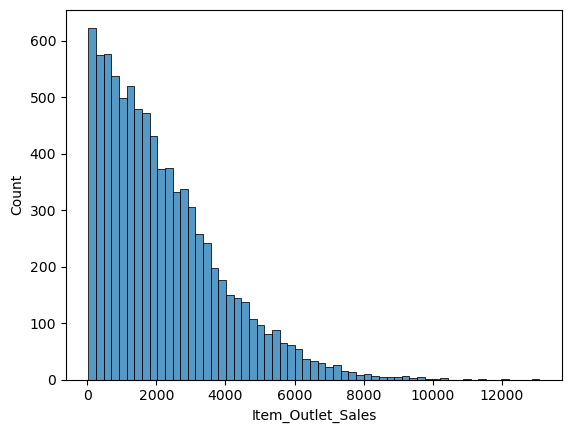

In [28]:
ax = sns.histplot(data = df, x = 'Item_Outlet_Sales')


### Summary Statistics for Numeric Features

In [29]:
stats =  df.describe()
stats.loc[['min','max','mean']]


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales
min,4.555000,0.000000,31.290000,10.000000,1985.000000,33.290000
max,21.350000,0.328391,266.888400,49.000000,2009.000000,13086.964800
mean,12.857645,0.066132,140.992782,29.108765,1997.831867,2181.288914


seems everything looks good with numerics data  statistics

#  part 3

create exploratory visuals that might help us understand, explain, or model our data. 

Histograms to view the distributions of numerical features in our dataset.
Boxplots to view statistical summaries of numerical features in our dataset.
Countplots to view the frequency of each class of categorial features in our dataset.
Heatmap to view the correlation between features.


## Exploratory Data Analysis


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int32  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int32(1), int64(1), object(6)
memory usage: 765.9+ KB


### Histograms to view the distributions of numerical features in our dataset.


define all dictionary data as a list to show more informative chart title

In [31]:
# Identify dictionary data
dictionary_descriptions = {
    "Item_Identifier": "Product ID",
    "Item_Weight": "Weight of product",
    "Item_Fat_Content": "product is low-fat or regular",
    "Item_Visibility": "product display area  percentage",
    "Item_Type": "product category",
    "Item_MRP": "Maximum Retail Price",
    "Outlet_Identifier": "Store ID",
    "Outlet_Establishment_Year": "store Establishment year",
    "Outlet_Size": "store size (ground area covered)",
    "Outlet_Location_Type": "type of area of the store location",
    "Outlet_Type": "grocery store or supermarket",
    "Item_Outlet_Sales": "Sales of the product (target variable)"
}


In [32]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [33]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')


 Distribution of Weight of product  



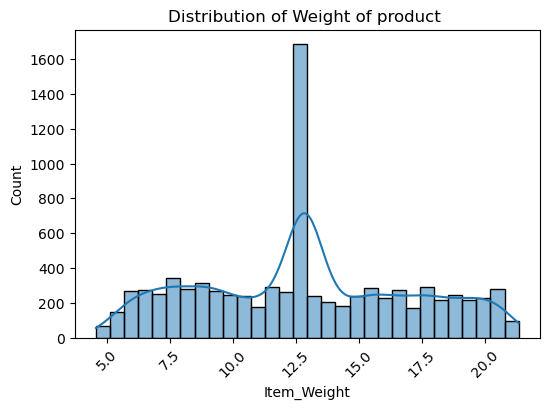


 Distribution of product display area  percentage  



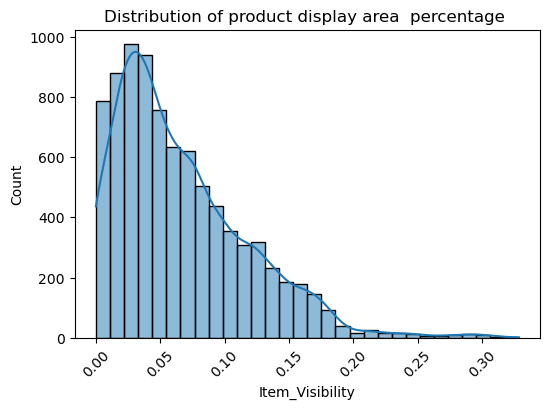


 Distribution of Maximum Retail Price  



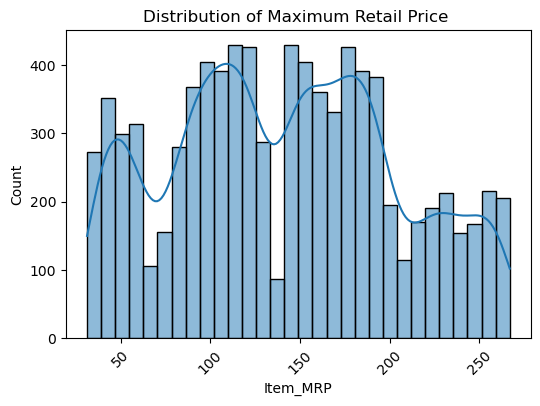


 Distribution of store Establishment year  



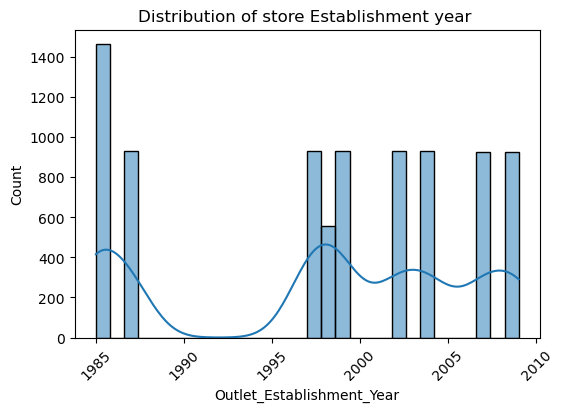


 Distribution of Sales of the product (target variable)  



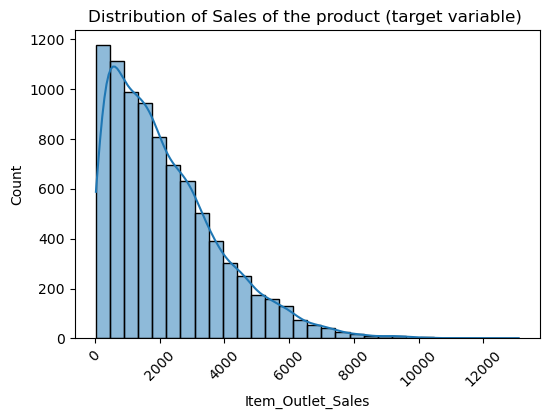

In [34]:

# Loop through numerical columns and plot histograms
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    ax = sns.histplot(data=df, x=col, kde=True , bins=30)
    ax.ticklabel_format(style='plain', axis='x')
    ax.tick_params(axis='x', rotation=45)
    ax.set_title(f'Distribution of {dictionary_descriptions[col]} ')
    ax.set_ylabel('Count')
    print(f'\n Distribution of {dictionary_descriptions[col]}  \n')
    plt.show()  # Display the plot

### Boxplots to view statistical summaries of numerical features in our dataset.



 statistical summaries Weight of product  



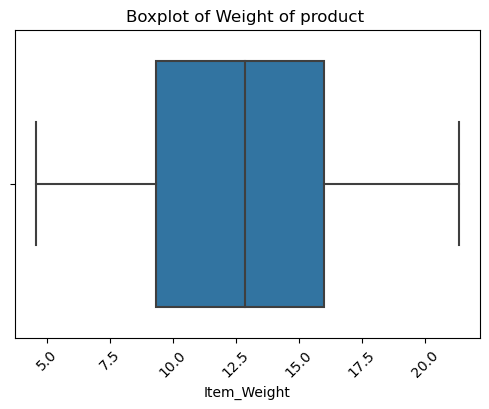


 statistical summaries product display area  percentage  



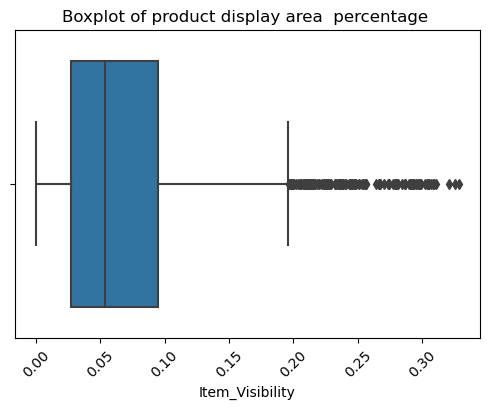


 statistical summaries Maximum Retail Price  



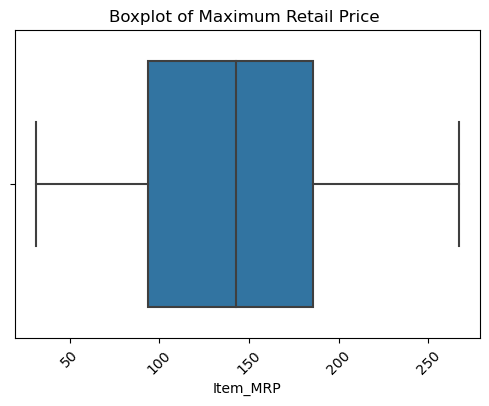


 statistical summaries store Establishment year  



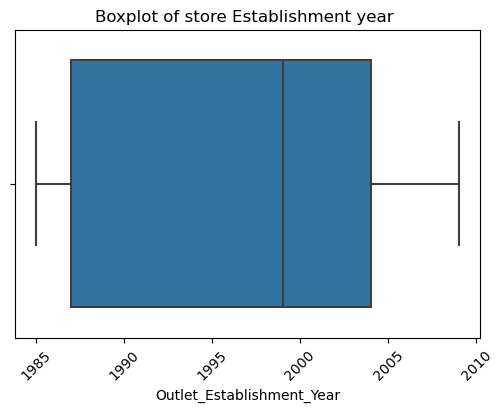


 statistical summaries Sales of the product (target variable)  



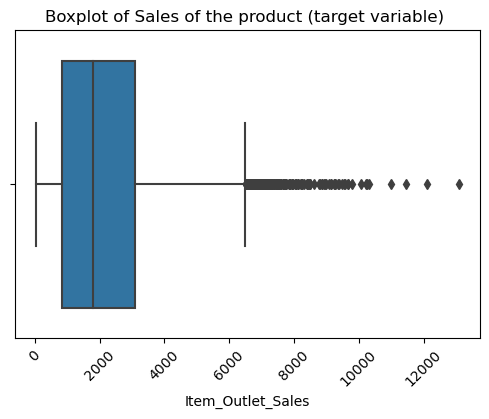

In [35]:

# Loop through numerical columns and plot histograms
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    ax = sns.boxplot(data=df, x=df[col])  # Plot histogram with percentages
    ax.ticklabel_format(style='plain', axis='x')
    ax.tick_params(axis='x', rotation=45)
    ax.set_title(f'Boxplot of {dictionary_descriptions[col]} ')
    print(f'\n statistical summaries {dictionary_descriptions[col]}  \n')
    plt.show()  # Display the plot



### Countplots to view the frequency of each class of categorial features in our dataset.

In [36]:
# Identify numerical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
categorical_columns = categorical_columns.difference({'Item_Identifier', 'Outlet_Identifier'})
categorical_columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Size',
       'Outlet_Type'],
      dtype='object')


 countplot of product is low-fat or regular  



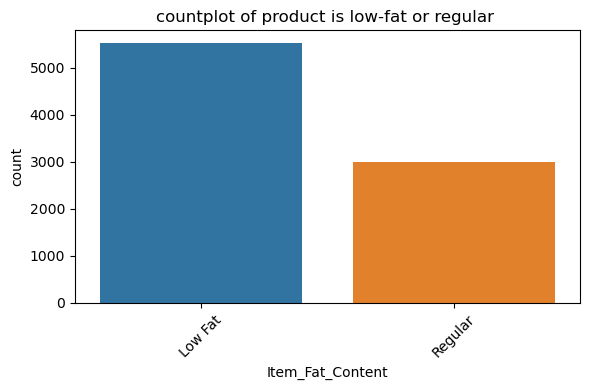


 countplot of product category  



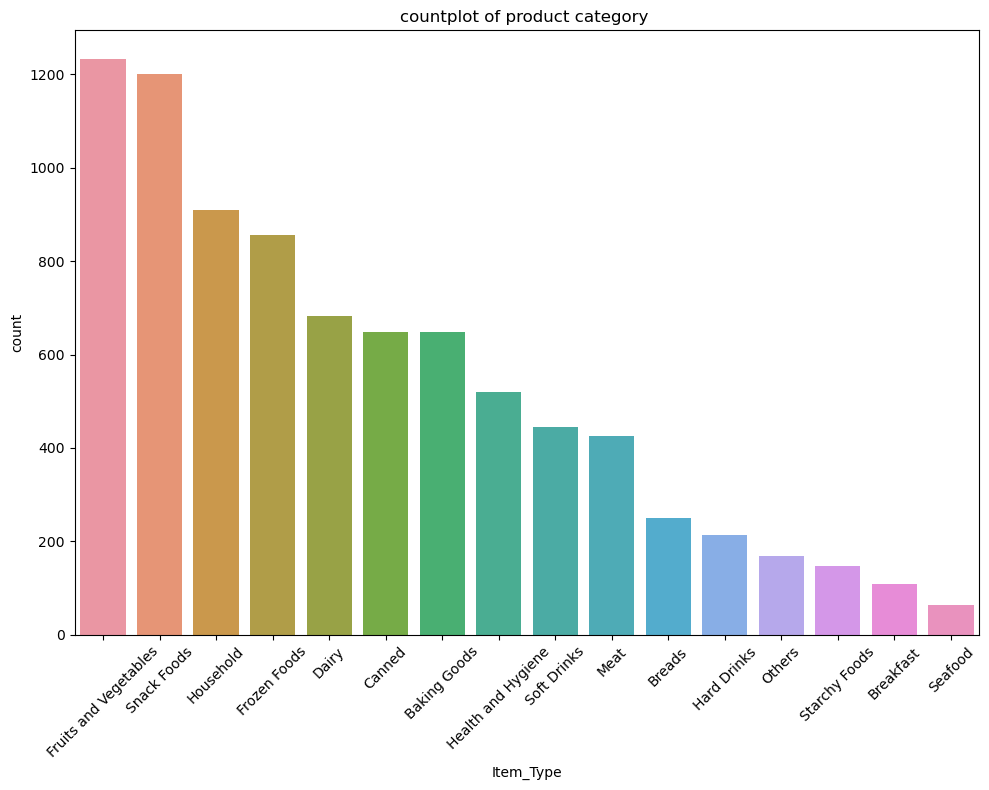


 countplot of type of area of the store location  



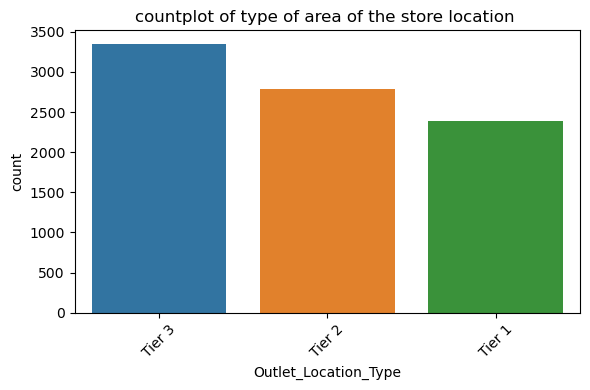


 countplot of store size (ground area covered)  



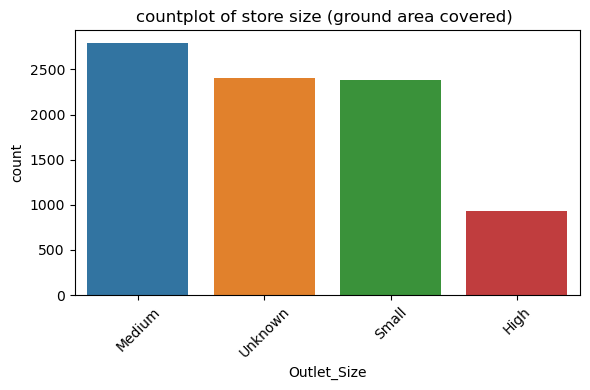


 countplot of grocery store or supermarket  



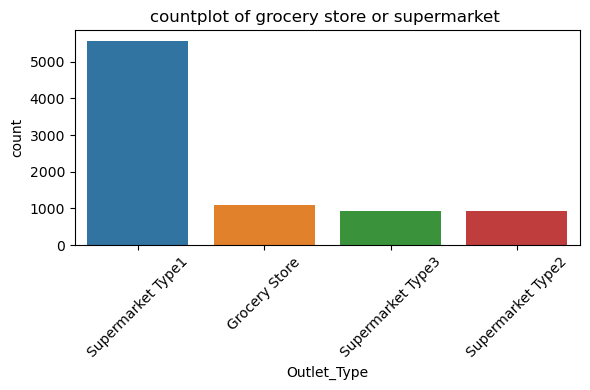

In [37]:
# Loop through numerical columns and plot histograms
for col in categorical_columns:
  if col=='Item_Type':
    plt.figure(figsize=(10, 8))  # Increase figure size just for Item_Type chart
  else:
    plt.figure(figsize=(6, 4))
  ax = sns.countplot(x=df[col], order = df[col].value_counts().index)
  ax.tick_params(axis='x', rotation=45)
  ax.set_title(f'countplot of {dictionary_descriptions[col]} ')
  print(f'\n countplot of {dictionary_descriptions[col]}  \n')
  plt.tight_layout()  # Adjust layout to fit labels
  plt.show()  # Display the plot

### Heatmap to view the correlation between features.


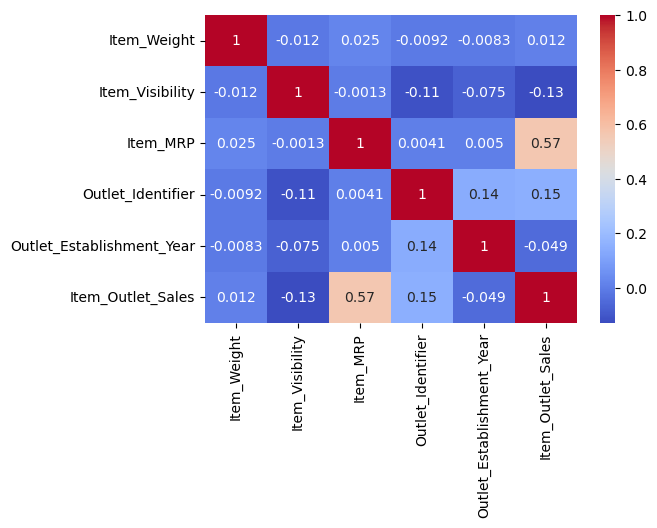

In [38]:
# Get correlations
corr = df.corr(numeric_only = True)
corr.round(2)
# Create a fig, ax with a figsize argument
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(corr, cmap = 'coolwarm', annot = True, ax=ax);

#  part 4 

## Feature Inspection


### data inspection

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int32  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int32(1), int64(1), object(6)
memory usage: 765.9+ KB


### inspecting Item_Weight

Item_Weight: Weight of product

#### univariate visualization showing the distribution of values/categories

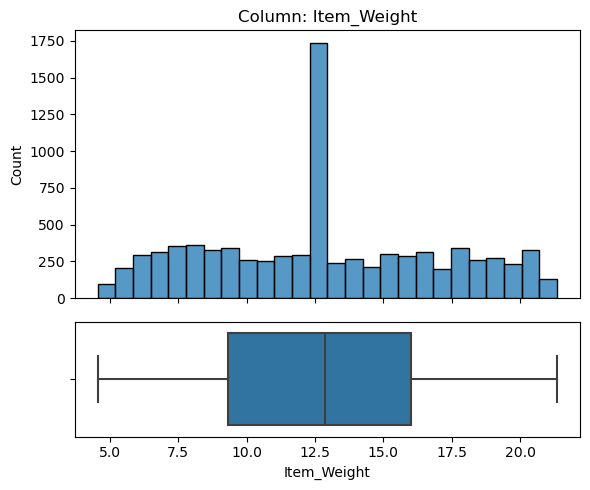

- NaN's Found: 0 (0.0%)
- Unique Values: 416
- Most common value: '12.857645184135976' occurs 1463 times (17.17%)


In [40]:
explore_numeric(df,x='Item_Weight')

- What type of feature is it?  `numeric`
- How many null values? `1463 ` What percentage?`17.17%` What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)` as there is no correlation with target value we may impute with mean as there is no much outlayers from above chart and the distribution is normal `
-Is the feature constant or quasi-constant? `no there is no value represent more than 95% of the data`
-What is the cardinality? Is it high (>10)?
`not categorical feature `
-Would we know this feature before the target is determined?`yes each item wight can be measured before predicting`

- Is there a business case/understanding reason to exclude based on our business case?`no`


####  multivariate visualization plotting feature vs. the target

C:\Users\hekmat.ashqar\AppData\Local\Temp\ipykernel_14384\702433938.py:185: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


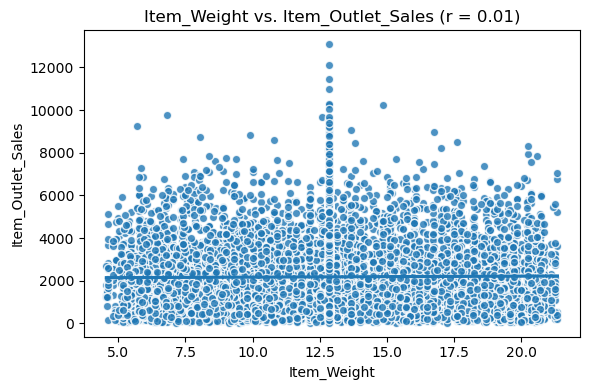

In [41]:
plot_numeric_vs_target(df, x='Item_Weight', y='Item_Outlet_Sales', figsize=(6,4));

-Based on your business understanding, would you expect this feature to be a predictor of the target?`No i think  Weight does not affect the sales of a product  `
-Does this feature appear to be a predictor of the target?`No , there is no correlation at all just as we excpected `

### inspecting Item_Fat_Content

Item_Fat_Content :	Whether the product is low-fat or regular


#### univariate visualization showing the distribution of values/categories

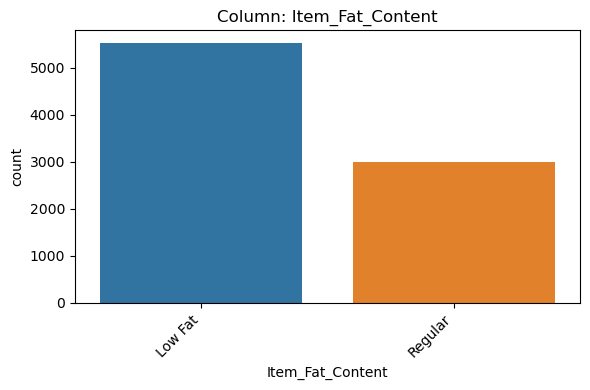

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [42]:
explore_categorical(df,x='Item_Fat_Content', fillna = True, placeholder = 'MISSING');

- What type of feature is it?  `Categorical (nominal)`
- How many null values? `zero `
-Is the feature constant or quasi-constant? `no there is no value represent more than 95% of the data`
-What is the cardinality? Is it high (>10)?
`no cardinality is just 2 values `
-Would we know this feature before the target is determined?`yes each item fat content can be measured`

- Is there a business case/understanding reason to exclude based on our business case?`no`


####  multivariate visualization plotting feature vs. the target

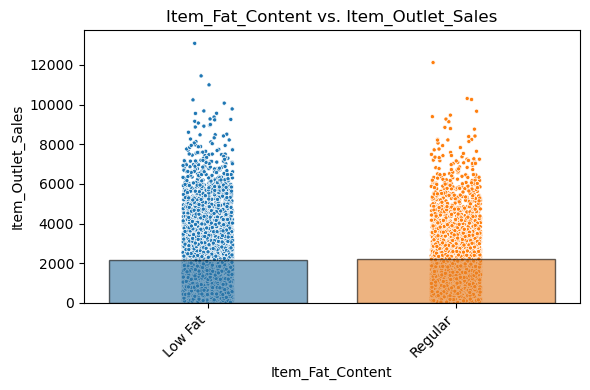

In [43]:
plot_categorical_vs_target(df, x='Item_Fat_Content', y='Item_Outlet_Sales', figsize=(6,4));

- Based on your business understanding, would you expect this feature to be a predictor of the target?`yes i think  low fat product would have mush less sales than regular maybe due to high price`
- Does this feature appear to be a predictor of the target?`stangely No , seems this feature has no effect at night the price nor the sales `

to confirm our hypothesis just ckecking the price also

In [44]:
df.groupby('Item_Fat_Content')['Item_MRP'].mean()

Item_Fat_Content
Low Fat    140.714098
Regular    141.504259
Name: Item_MRP, dtype: float64

### inspecting Item_Visibility

Item_Visibility:	The percentage of total display area of all products in a store allocated to the particular product


#### univariate visualization showing the distribution of values/categories

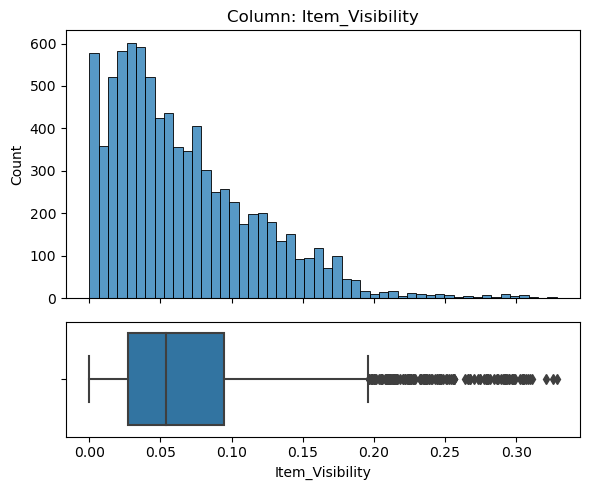

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)


In [45]:
explore_numeric(df,x='Item_Visibility')

- What type of feature is it?  `numeric`
- How many null values? `none` What percentage?`0%` What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)` no null value but we need to make sure if the zeros values `
-Is the feature constant or quasi-constant? `no there is no value represent more than 95% of the data`
-What is the cardinality? Is it high (>10)?
`not categorical feature `
-Would we know this feature before the target is determined?`yes each item can be controlled by the stores`

- Is there a business case/understanding reason to exclude based on our business case?`no`


####  multivariate visualization plotting feature vs. the target

C:\Users\hekmat.ashqar\AppData\Local\Temp\ipykernel_14384\702433938.py:185: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


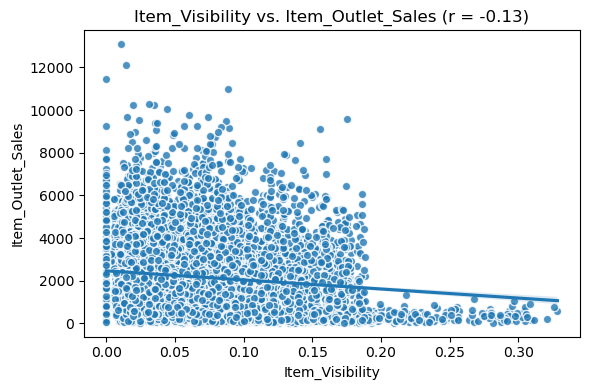

In [46]:
plot_numeric_vs_target(df, x='Item_Visibility', y='Item_Outlet_Sales', figsize=(6,4));

- Based on your business understanding, would you expect this feature to be a predictor of the target?`yes should be more visibility more sales  `
- Does this feature appear to be a predictor of the target?`No , in fact there is small negative correlation seems no connection  `

### inspecting Item_Type

Item_Type	The category to which the product belongs


#### univariate visualization showing the distribution of values/categories

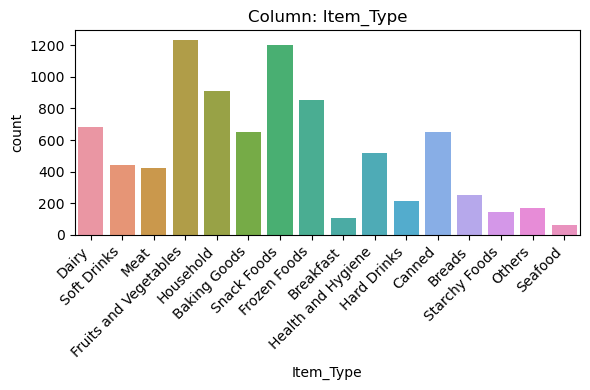

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [47]:
explore_categorical(df,x='Item_Type', fillna = True, placeholder = 'MISSING');

- What type of feature is it?  `Categorical (nominal)`
- How many null values? `zero `
-Is the feature constant or quasi-constant? `no there is no value represent more than 95% of the data`
-What is the cardinality? Is it high (>10)?
`yes it is high we have 16 unique values `
-Would we know this feature before the target is determined?`yes `
- Is there a business case/understanding reason to exclude based on our business case?`no we think this feature  will be predictor , but we may need to find a way to put them into groups to decrese cardinality`


####  multivariate visualization plotting feature vs. the target

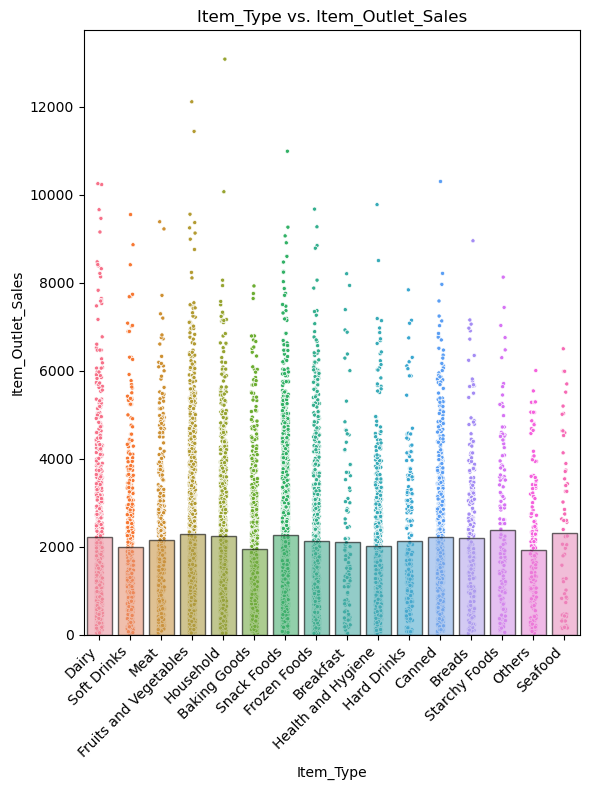

In [48]:
plot_categorical_vs_target(df, x='Item_Type', y='Item_Outlet_Sales', figsize=(6,8));

- Based on your business understanding, would you expect this feature to be a predictor of the target?`yes i think item type may help us categorize the item based on sales `
- Does this feature appear to be a predictor of the target?`yes there is small but noticable difference between each category mean  `

### inspecting Item_MRP

Item_MRP:	Maximum Retail Price (list price) of the product


#### univariate visualization showing the distribution of values/categories

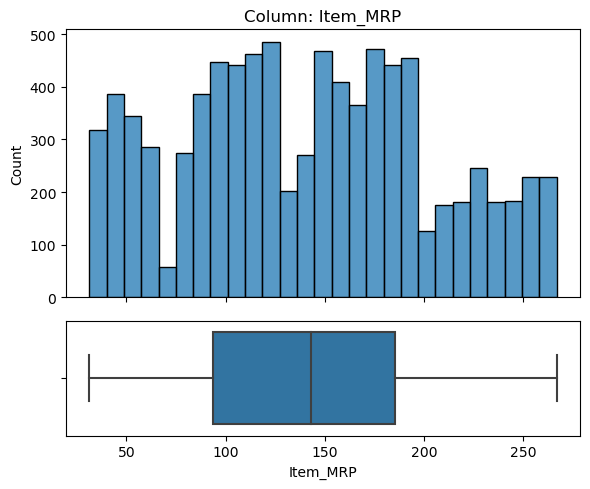

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)


In [49]:
explore_numeric(df,x='Item_MRP')

- What type of feature is it?  `numeric`
- How many null values? `none` What percentage?`0%` What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)` no null value  `
-Is the feature constant or quasi-constant? `no there is no value represent more than 95% of the data`
-What is the cardinality? Is it high (>10)?
`not categorical feature `
-Would we know this feature before the target is determined?`yes each item can be controlled by the stores`

- Is there a business case/understanding reason to exclude based on our business case?`no`


####  multivariate visualization plotting feature vs. the target

C:\Users\hekmat.ashqar\AppData\Local\Temp\ipykernel_14384\702433938.py:185: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


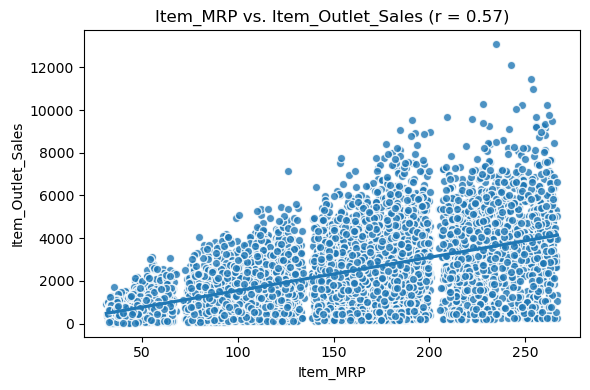

In [50]:
plot_numeric_vs_target(df, x='Item_MRP', y='Item_Outlet_Sales', figsize=(6,4));

- Based on your business understanding, would you expect this feature to be a predictor of the target?`yes maybe negative correlation   `
- Does this feature appear to be a predictor of the target?`yes  , in fact  there is strong positive correlation   `

### belwo two feature should be dropped as there is no relation or affect with target feature and can't be controlled by store owner if any action needed to increase some product sales

#### inspecting Outlet_Identifier

Outlet_Identifier	Store ID


##### univariate visualization showing the distribution of values/categories

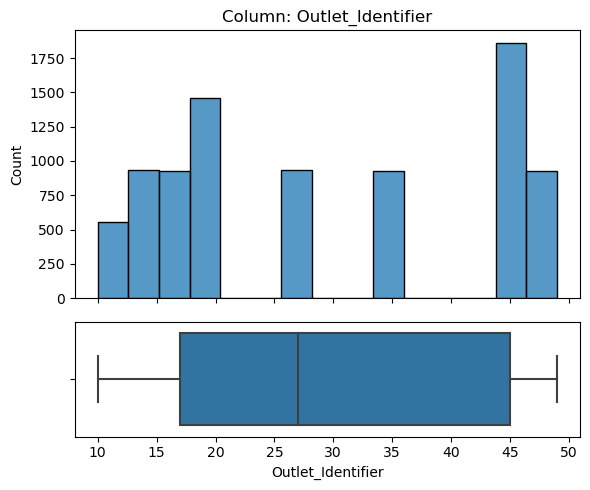

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: '27' occurs 935 times (10.97%)


In [51]:
explore_numeric(df,x='Outlet_Identifier')

- What type of feature is it?  `numeric`
- How many null values? `none` What percentage?`0%` What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)` no null value  `
-Is the feature constant or quasi-constant? `no there is no value represent more than 95% of the data`
-What is the cardinality? Is it high (>10)?
`not categorical feature `
-Would we know this feature before the target is determined?`yes  `

- Is there a business case/understanding reason to exclude based on our business case?`yes no need for this feature `


#####  multivariate visualization plotting feature vs. the target

C:\Users\hekmat.ashqar\AppData\Local\Temp\ipykernel_14384\702433938.py:185: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


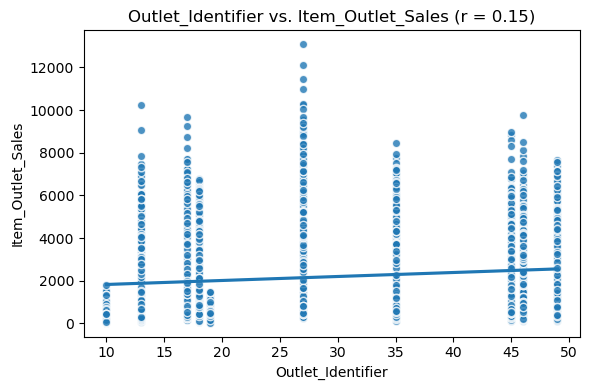

In [52]:
plot_numeric_vs_target(df, x='Outlet_Identifier', y='Item_Outlet_Sales', figsize=(6,4));

- Based on your business understanding, would you expect this feature to be a predictor of the target?`no `
- Does this feature appear to be a predictor of the target?`no , this feature should be dropped   `

#### inspecting Outlet_Establishment_Year

Outlet_Establishment_Year:	The year in which store was established


##### univariate visualization showing the distribution of values/categories

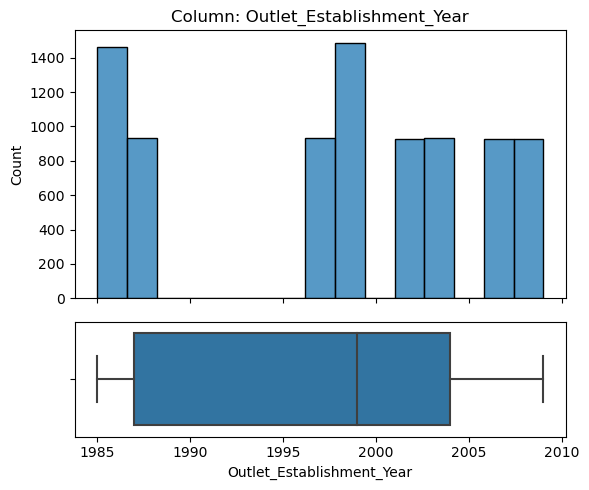

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)


In [53]:
explore_numeric(df,x='Outlet_Establishment_Year')

- What type of feature is it?  `numeric`
- How many null values? `none` What percentage?`0%` What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)` no null value  `
-Is the feature constant or quasi-constant? `no there is no value represent more than 95% of the data`
-What is the cardinality? Is it high (>10)?
`not categorical feature `
-Would we know this feature before the target is determined?`yes each item can be controlled by the stores`

- Is there a business case/understanding reason to exclude based on our business case?`yes these feature has no effect at the product sales `


#####  multivariate visualization plotting feature vs. the target

C:\Users\hekmat.ashqar\AppData\Local\Temp\ipykernel_14384\702433938.py:185: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


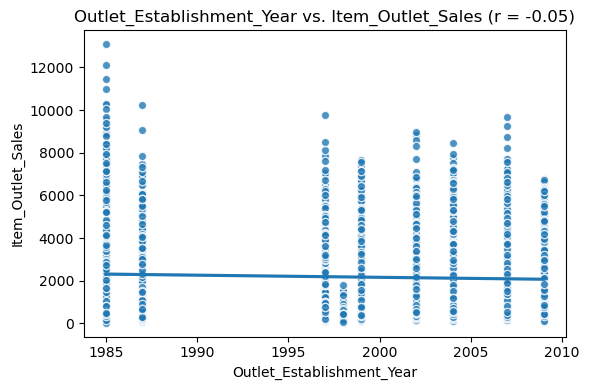

In [54]:
plot_numeric_vs_target(df, x='Outlet_Establishment_Year', y='Item_Outlet_Sales', figsize=(6,4));

- Based on your business understanding, would you expect this feature to be a predictor of the target?`no `
- Does this feature appear to be a predictor of the target?`no , this feature should be dropped   `

### inspecting Outlet_Size

Outlet_Size	The size of the store in terms of ground area covered


#### univariate visualization showing the distribution of values/categories

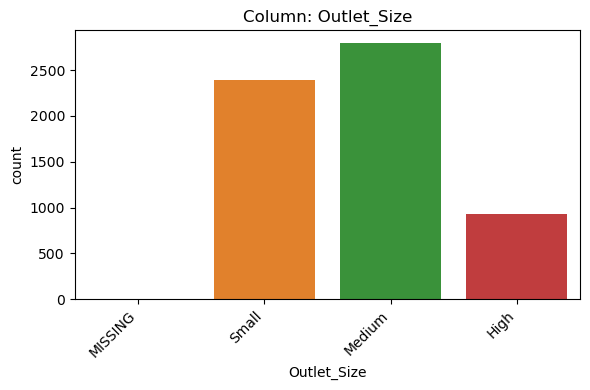

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [55]:
category_order = ['MISSING','Small', 'Medium', 'High']
explore_categorical(df,x='Outlet_Size', fillna = True, placeholder = 'MISSING', order = category_order);

- What type of feature is it?  `ordinal`
- How many null values? `2410 ` What percentage? `28.28% ` What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)`we should imput for missing as there is no evidance what this could be and we want to keep as amuch data as possible and we will invistigate the relation more to know what to do `
-Is the feature constant or quasi-constant? `no there is no value represent more than 95% of the data`
-What is the cardinality? Is it high (>10)?
`no only 3 values without missing  `
-Would we know this feature before the target is determined?`yes `
- Is there a business case/understanding reason to exclude based on our business case?`no we think this feature  will be predictor  `


####  multivariate visualization plotting feature vs. the target

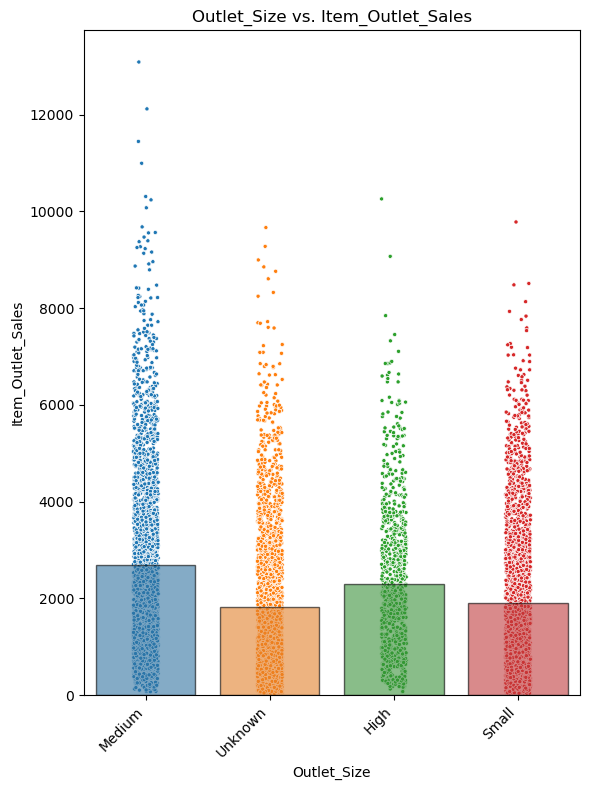

In [56]:
plot_categorical_vs_target(df, x='Outlet_Size', y='Item_Outlet_Sales', figsize=(6,8));

- Based on your business understanding, would you expect this feature to be a predictor of the target?`yes i think store size have correlation with target  `
- Does this feature appear to be a predictor of the target?`yes there is small but noticable difference between each category mean and we noticed that unkown mean is near small mean and seems we should impute with small  `

### inspecting Outlet_Location_Type

Outlet_Location_Type:	The type of area in which the store is located


#### univariate visualization showing the distribution of values/categories

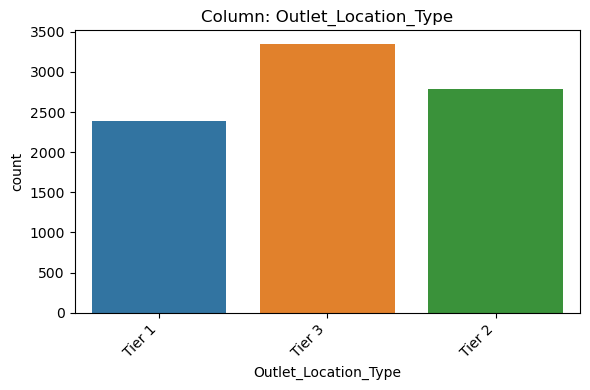

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [57]:
explore_categorical(df,x='Outlet_Location_Type', fillna = True, placeholder = 'MISSING');

- What type of feature is it?  `ordinal`
- How many null values? `zero`
-Is the feature constant or quasi-constant? `no there is no value represent more than 95% of the data`
-What is the cardinality? Is it high (>10)?
`no only 3 values   `
-Would we know this feature before the target is determined?`yes `
- Is there a business case/understanding reason to exclude based on our business case?`no we think this feature  will be predictor  `


####  multivariate visualization plotting feature vs. the target

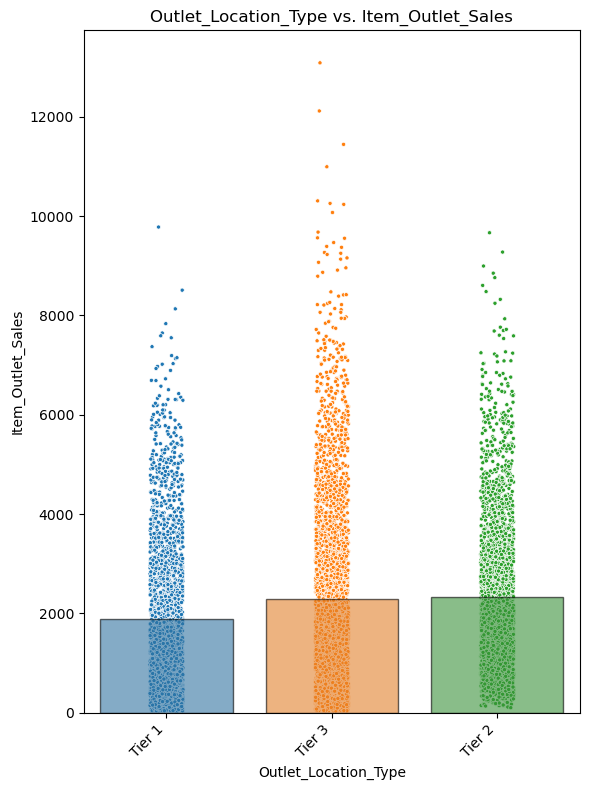

In [58]:
plot_categorical_vs_target(df, x='Outlet_Location_Type', y='Item_Outlet_Sales', figsize=(6,8));

- Based on your business understanding, would you expect this feature to be a predictor of the target?`yes i think store location have correlation with target  `
- Does this feature appear to be a predictor of the target?`yes there is small but noticable difference between each category mean  `

### inspecting Outlet_Type

Outlet_Type	Whether the outlet is a grocery store or some sort of supermarket


#### univariate visualization showing the distribution of values/categories

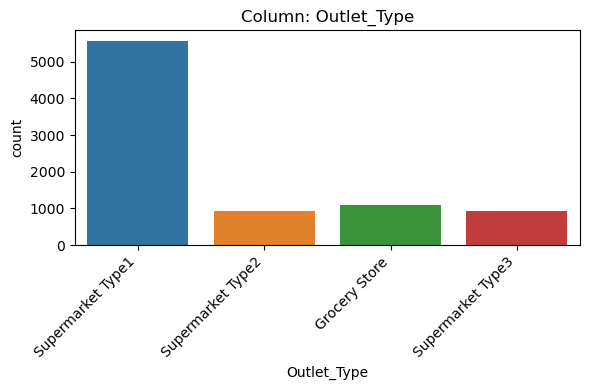

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [59]:
explore_categorical(df,x='Outlet_Type', fillna = True, placeholder = 'MISSING');

- What type of feature is it?  `Categorical (nominal),`
- How many null values? `zero`
-Is the feature constant or quasi-constant? `no there is no value represent more than 95% of the data`
-What is the cardinality? Is it high (>10)?
`no only 4 values   `
-Would we know this feature before the target is determined?`yes `
- Is there a business case/understanding reason to exclude based on our business case?`no we think this feature  will be predictor  `


####  multivariate visualization plotting feature vs. the target

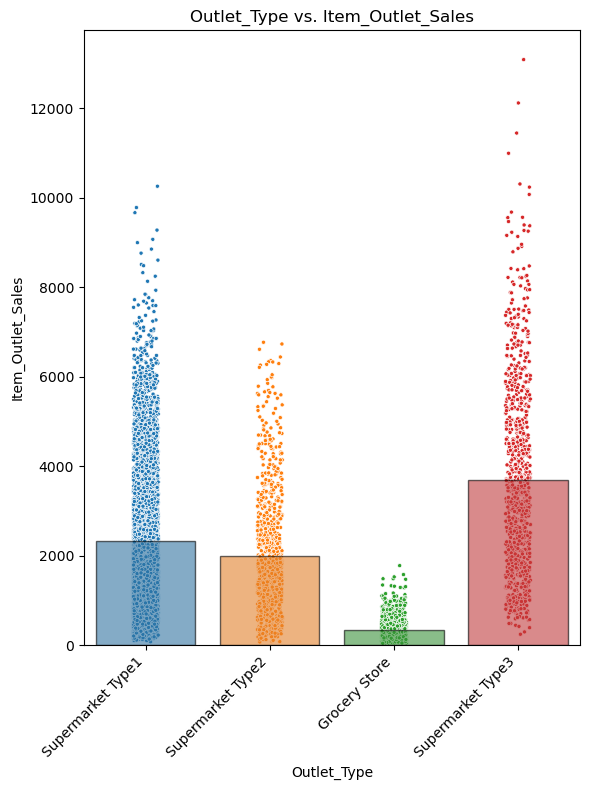

In [60]:
plot_categorical_vs_target(df, x='Outlet_Type', y='Item_Outlet_Sales', figsize=(6,8));

- Based on your business understanding, would you expect this feature to be a predictor of the target?`yes i think store type have correlation with target  `
- Does this feature appear to be a predictor of the target?`yes there is noticable difference between each category mean  `

# part 5

## Preprocesing for Machine Learning

<p>we will go back to our original, uncleaned, sales prediction dataset with the goal of preventing data leakage.  </p>


### Data Load

In [61]:
## Typical Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Modeling & preprocessing import
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer

from sklearn import set_config
set_config(transform_output='pandas')

In [62]:
# Save the filepath and load the data as "df_sales"

# path = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'

path = 'file:///C:/Users/hekmat.ashqar/Documents/GitHub/Prediction-of-Product-Sales/sales_predictions_2023.csv'
df_new = pd.read_csv(path)
df_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


### checking missing value  

In [63]:
df_new.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### checking duplicates

In [64]:
df_new.duplicated().sum()

0

### Inspecting Categorical Columns & Addressing Inconsistent Values

In [65]:
data_types = df_new.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [66]:
for col in str_cols:
    print(f'- {col}:')
    print(df_new[col].value_counts(dropna=False))
    print("\n\n")

- Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



- Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



- Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64



- Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    9

After further investigation of the categorical columns, there are inconsistencies with spellings of the following categories in the Item_Fat_Content column

LF should be Low Fat

low fat should be Low Fat

reg should be Regular

In [67]:

df_new['Item_Fat_Content'].value_counts()


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [68]:
Item_Fat_Content_map = {'LF':'Low Fat',
                        'low fat':'Low Fat',
                        'reg':'Regular'}

df_new['Item_Fat_Content'] = df_new['Item_Fat_Content'].replace(Item_Fat_Content_map)
df_new['Item_Fat_Content'].value_counts()


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [69]:
def group_item_types(item_type):
    if item_type in ['Fruits and Vegetables', 'Meat', 'Seafood']:
        return 'Fresh Foods'
    elif item_type in ['Frozen Foods']:
        return 'Frozen Foods'
    elif item_type == 'Dairy':
        return 'Dairy'
    elif item_type in ['Canned', 'Baking Goods', 'Starchy Foods']:
        return 'Pantry Items'
    elif item_type in ['Soft Drinks', 'Hard Drinks']:
        return 'Drinks'
    elif item_type in ['Health and Hygiene']:
        return 'Health & Hygiene'
    else:
        return 'Others'

# Apply the function to the DataFrame
df_new['Item_Type'] = df_new['Item_Type'].apply(group_item_types)

In [70]:
df_new['Item_Type'].value_counts()

Others              2640
Fresh Foods         1721
Pantry Items        1445
Frozen Foods         856
Dairy                682
Drinks               659
Health & Hygiene     520
Name: Item_Type, dtype: int64

In [71]:
df_new['Item_Type'].value_counts()

Others              2640
Fresh Foods         1721
Pantry Items        1445
Frozen Foods         856
Dairy                682
Drinks               659
Health & Hygiene     520
Name: Item_Type, dtype: int64

### Train Test Split


In [72]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [73]:
df_new.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Fresh Foods,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fresh Foods,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Others,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Pantry Items,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Others,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Others,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [103]:
# The target we are trying to predict
target = 'Item_Outlet_Sales'
y = df_new[target]
# The features we will use to make the prediction
#commented for tuning
#X = df_new.drop(columns=[target , 'Item_Identifier'])
X = df_new.drop(columns=[target , 'Item_Identifier', 'Outlet_Identifier','Outlet_Establishment_Year'])
#X = df_new.drop(columns=[target , 'Item_Identifier', 'Item_Type','Item_Weight'])
#X = df_new.drop(columns=[target , 'Item_Identifier','Item_Weight', 'Outlet_Identifier','Outlet_Establishment_Year'])

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,16.350,Low Fat,0.029565,Others,256.4646,Medium,Tier 3,Supermarket Type2
7510,15.250,Regular,0.000000,Others,179.7660,Medium,Tier 3,Supermarket Type2
5828,12.350,Regular,0.158716,Fresh Foods,157.2946,Medium,Tier 1,Supermarket Type1
5327,7.975,Low Fat,0.014628,Pantry Items,82.3250,Small,Tier 2,Supermarket Type1
4810,19.350,Low Fat,0.016645,Frozen Foods,120.9098,NaN,Tier 2,Supermarket Type1


### Making a Preprocessing Pipeline

#### For the numeric features pipeline:


In [104]:
# PREPROCESSING PIPELINE FOR NUMERIC DATA
# Save list of column names
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)
# instantiate preprocessors
impute_median = SimpleImputer(strategy='mean')
scaler = StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)
num_pipe

Numeric Columns: Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')


Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

#### For the ordinal pipeline:


# PREPROCESSING PIPELINE FOR ORDINAL DATA
# Save list of column names
#commented for tuning
#ord_cols = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']
#ord_cols = [ 'Outlet_Size','Outlet_Location_Type']
ord_cols = [ 'Outlet_Size' ]
print("Ordinal Columns:", ord_cols)

#ord_imputer = SimpleImputer(strategy='most_frequent')
ord_imputer = SimpleImputer(strategy='constant', fill_value='Small')


# Specifying order of categories for our  Ordinal Qual/Cond Columms

#Fat_cond_order = ['Low Fat','Regular']
Size_cond_order = ['Small','Medium', 'High']
#Type_cond_order = ['Tier 1','Tier 2', 'Tier 3' ]
# Making the list of order lists for OrdinalEncoder
#ordinal_category_orders = [Fat_cond_order, Size_cond_order,Type_cond_order]
ordinal_category_orders = [ Size_cond_order]
ord_encoder = OrdinalEncoder(categories=ordinal_category_orders)
# Making a final scaler to scale category #'s
scaler_ord = StandardScaler()
## Making an ord_pipe
ord_pipe = make_pipeline(ord_imputer, ord_encoder, scaler_ord)
ord_pipe


In [105]:

# PREPROCESSING PIPELINE FOR ORDINAL DATA
# Save list of column names
#commented for tuning
ord_cols = ['Outlet_Size','Outlet_Location_Type']
print("Ordinal Columns:", ord_cols)

ord_imputer = SimpleImputer(strategy='most_frequent')

# Specifying order of categories for our  Ordinal Qual/Cond Columms

Size_cond_order = ['Small','Medium', 'High']
Type_cond_order = ['Tier 1','Tier 2', 'Tier 3' ]
# Making the list of order lists for OrdinalEncoder
ordinal_category_orders = [  Size_cond_order, Type_cond_order]
ord_encoder = OrdinalEncoder(categories=ordinal_category_orders)
# Making a final scaler to scale category #'s
scaler_ord = StandardScaler()
## Making an ord_pipe
ord_pipe = make_pipeline(ord_imputer, ord_encoder, scaler_ord)
ord_pipe

Ordinal Columns: ['Outlet_Size', 'Outlet_Location_Type']


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['Small', 'Medium', 'High'],
                                            ['Tier 1', 'Tier 2', 'Tier 3']])),
                ('standardscaler', StandardScaler())])

#### For categorical (nominal) pipeline:

In [106]:
# PREPROCESSING PIPELINE FOR ONE-HOT-ENCODED DATA
# Save list of column names
ohe_cols = X_train.select_dtypes('object').drop(columns=ord_cols).columns
print("OneHotEncoder Columns:", ohe_cols)
# Instantiate the individual preprocessors
impute_na = SimpleImputer(strategy='constant', fill_value = "NA")
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(impute_na, ohe_encoder)
ohe_pipe

OneHotEncoder Columns: Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Type'], dtype='object')


Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='NA', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

### Create a Column Transformer


In [107]:
# Making a ohe_tuple for ColumnTransformer
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)
# Making an ordinal_tuple for ColumnTransformer
ord_tuple = ('ordinal', ord_pipe, ord_cols)
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)

In [108]:
# Instantiate with verbose_feature_names_out=False
col_transformer = ColumnTransformer([num_tuple, ord_tuple, ohe_tuple],
                                    verbose_feature_names_out=False)

In [109]:
# Fit on training data
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'Hi...
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Size', 'Outlet_Location_Type']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Type'], dtype='object'))],
                  verbose_feature_names_out=False)

In [110]:
#X_train_processed = col_transformer.transform(X_train)
#X_test_processed = col_transformer.transform(X_test)

#  part 6

## CRISP-DM Phase 4 - Modeling

###  overview


<p><strong>CRISP-DM Phase 4 - Modeling</strong></p>



<p>1. our first task is to build a linear regression model to predict sales.</p>



<ul>
    <li>Build a linear regression model.</li><li>Use the custom evaluation function to get the metrics for your model (on training and test data).</li><li>Compare the training vs. test R-squared values and answer the question: to what extent is this model overfit/underfit?</li></ul>

<p>2. Your second task is to build a Random Forest model to predict sales.</p>



<ul>
        <li>Build a default Random Forest model.</li>
        <li>Use the custom evaluation function to get the metrics for your model (on training and test data).</li><li>Compare the training vs. test R-squared values and answer the question: to what extent is this model overfit/underfit?</li>
        <li>Compare this model's performance to the linear regression model: which model has the best test scores?</li></ul>

<ul></ul>

<p>3. Use GridSearchCV to tune at least two hyperparameters for a Random Forest model.</p>

<ul><li>After determining the best parameters from your GridSearch, fit and evaluate a final best model on the entire training set (no folds).</li><li>Compare your tuned model to your default Random Forest: did the performance improve? </li></ul>

<p><strong>CRISP-DM Phase 5 - Evaluation</strong><br></p>



<p>4. You now have tried several different models on your data set. You need to determine which model to implement. </p>



<ul>
        <li>Overall, which model do you recommend?</li>
        <li>Justify your recommendation.</li><li>In a Markdown cell:<ul><li>Interpret your model's performance based on R-squared in a way that your non-technical stakeholder can understand.</li></ul><ul><li>Select another regression metric (RMSE/MAE/MSE) to express the performance of your model to your stakeholder. </li></ul><ul><li>Include why you selected this metric to explain to your stakeholder.</li></ul><ul><li>Compare the training vs. test scores and answer the question: to what extent is this model overfit/underfit?</li></ul></li></ul>

<p><br></p>


### modeling imports

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor # NEW


### linear regression model

In [112]:
# Instantiate a linear regression model
linreg = LinearRegression()
# Combine the preprocessing ColumnTransformer and the linear regression model in a Pipeline
linreg_pipe = make_pipeline(col_transformer, linreg)
linreg_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEnco...
                                                   'Outlet_Location_Type']),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Type'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [113]:
# Fit the model pipeline on the training data
linreg_pipe.fit(X_train, y_train)
# Obtain Model Evulation using custom function
evaluate_regression(linreg_pipe, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 847.499
- MSE = 1,301,284.329
- RMSE = 1,140.739
- R^2 = 0.560

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 804.281
- MSE = 1,195,041.693
- RMSE = 1,093.180
- R^2 = 0.567


as we can see from R^2 values this model is under fit currently it is 0.562 which this mean this model predict poorly on the training data and on the testing data also  Therefore, we will explore using other models to see how they perform

### Random Forest model

In [114]:
# Instantiate default random forest model
rf = RandomForestRegressor(random_state = 42)
# Model Pipeline
rf_pipe = make_pipeline(col_transformer, rf)

In [115]:
# Fit the model pipeline on the training data only
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEnco...
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Type'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [116]:
# Use custom function to evaluate default model
evaluate_regression(rf_pipe, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 301.057
- MSE = 188,627.398
- RMSE = 434.313
- R^2 = 0.936

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 780.783
- MSE = 1,261,180.600
- RMSE = 1,123.023
- R^2 = 0.543


Given the significant drop in R^2 value from the training data to the test data (from 0.939 to 0.558), along with a substantial increase in errors (MAE, MSE, RMSE), it's clear that the model is overfitting. It has learned the training data too well, capturing noise in addition to the underlying data pattern, which has compromised its ability to generalize to unseen data (the test dataset).

While the Random Forest model shows a lower MAE, indicating better average prediction accuracy, the linear regression model has a slightly higher R^2 value (0.567 vs. 0.558) on the test data, suggesting it is slightly more effective at explaining the variance of the dependent variable. The differences are marginal but based solely on the R^2 value, the linear regression model could be considered to have the best test scores, implying it might generalize slightly better to unseen data compared to the initial model.but we will work on our model with GridSearchCV

#### GridSearchCV to tune a Random Forest model.

In [117]:
# Parameters for tuning
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')),
                                   ('ordinal',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('ordinalencoder',
                                                     OrdinalEncoder(categories=[['Small',
                                                                                 'Medium',
                                             

we commented below as we updated the params after running it to another round of tuning

In [118]:
#from sklearn.model_selection import  GridSearchCV
# Define param grid with options to try
#params = {'randomforestregressor__max_depth': [None,10,15,20],
#          'randomforestregressor__n_estimators':[10,100,150,200],
#          'randomforestregressor__min_samples_leaf':[1,2,3,4],
#          'randomforestregressor__max_features':['sqrt','log2',None],
#          'randomforestregressor__oob_score':[True,False],
#          }
# Instantiate the gridsearch
#gridsearch = GridSearchCV(rf_pipe, params, n_jobs=-1, cv = 3, verbose=1)
# Fit the gridsearch on training data
#gridsearch.fit(X_train, y_train)


round 2 for preprocess and tuning

In [119]:
#from sklearn.model_selection import  GridSearchCV
# Define param grid with options to try
#params = {
#          'randomforestregressor__max_depth': [5,10,15,20],
#          'randomforestregressor__n_estimators':[50,80,100,150],
#          'randomforestregressor__min_samples_leaf':[1,2,3],
#          'randomforestregressor__max_features':['sqrt','log2',None],
#         'randomforestregressor__oob_score':[True,False],          }
# Instantiate the gridsearch
#gridsearch = GridSearchCV(rf_pipe, params, n_jobs=-1, cv = 3, verbose=1)
# Fit the gridsearch on training data
#gridsearch.fit(X_train, y_train)

now we will just make round three for tuning

In [120]:
from sklearn.model_selection import  GridSearchCV
# Define param grid with options to try
params = {
    'randomforestregressor__max_depth': [4,5,6],
    'randomforestregressor__n_estimators': [30,40,50],
    'randomforestregressor__min_samples_leaf': [1,2],
    'randomforestregressor__min_samples_split': [ 5,7,10],
    'randomforestregressor__max_features':['sqrt','log2',None],
    'randomforestregressor__oob_score':[True]
    }
# Instantiate the gridsearch
gridsearch = GridSearchCV(rf_pipe, params, n_jobs=-1, cv = 7, verbose=1)
# Fit the gridsearch on training data
gridsearch.fit(X_train, y_train)

Fitting 7 folds for each of 162 candidates, totalling 1134 fits


GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')),
                                                                        ('ordinal',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         (...
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [4, 5, 6],
                         'randomforestregressor__max_features': ['sqrt', 'log2',
                                                                 None],
                         'randomforestregressor__min_samples_leaf': [1, 2],
                         'randomforestregressor__min_samples_split': [5, 7, 10],
                         'randomforestregressor__n_estimators': [30, 40, 50],
                         'randomforestregressor__oob_score': [True]},
             verbose=1)

In [121]:
# Obtain best parameters
gridsearch.best_params_

{'randomforestregressor__max_depth': 5,
 'randomforestregressor__max_features': None,
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__min_samples_split': 7,
 'randomforestregressor__n_estimators': 50,
 'randomforestregressor__oob_score': True}

#### Result 

In [122]:
# Define and refit best model
best_rf = gridsearch.best_estimator_
evaluate_regression(best_rf, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 754.990
- MSE = 1,152,182.075
- RMSE = 1,073.397
- R^2 = 0.611

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 729.698
- MSE = 1,101,939.046
- RMSE = 1,049.733
- R^2 = 0.601


first round result were :

| Metric             | Linear Regression (Train) | Linear Regression (Test) | Random Forest (Train) | Random Forest (Test) | Random Forest (Tuned Train) | Random Forest (Tuned Test) |
|--------------------|----------------------------|---------------------------|------------------------|-----------------------|------------------------------|-----------------------------|
| MAE                | 847.138                    | 804.140                   | 295.843                | 766.868               | 642.573                      | 737.835                     |
| MSE                | 1,297,556.213              | 1,194,367.485             | 181,760.903            | 1,219,470.620         | 823,011.229                  | 1,128,227.912               |
| RMSE               | 1,139.103                  | 1,092.871                 | 426.334                | 1,104.296             | 907.200                      | 1,062.181                   |
| R^2                | 0.562                      | 0.567                     | 0.939                  | 0.558                 | 0.722                        | 0.591                       |


The tuning process appears to have made the Random Forest model generalize better.  the model's performance on the test data improved. This improvement on the test set, particularly the increase in R^2 from 0.558 to 0.591, indicates better generalization to unseen data. The reduction in overfitting is a desirable outcome of model tuning, as it suggests the model will perform more consistently on new data .

we are not satisfie with the result we will revisit and try to enhance the preprocess and model

will use the comment #commented for tuning to figure this modification


we will revisit preprocessiong data and consider the below modification :
- belwo two feature should be dropped as there is no relation or affect with target feature and can't be controlled by store owner if any action needed to increase some product sales

`Outlet_Identifier`
`Outlet_Establishment_Year`

- change Item_Fat_Content to nominal not ordinal




### DecisionTreeRegressor

In [123]:

# Instantiate a Default Model
DecisionTree = DecisionTreeRegressor(random_state = 42)
# Model Pipeline with default preprocessor and default model
DecisionTree_pipe = make_pipeline(col_transformer, DecisionTree)
# Fit the model pipeline on the training data only
DecisionTree_pipe.fit(X_train, y_train)
# Call custom function for evaluation
evaluate_regression(DecisionTree_pipe, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 0.000
- MSE = 0.000
- RMSE = 0.000
- R^2 = 1.000

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 1,061.816
- MSE = 2,391,714.765
- RMSE = 1,546.517
- R^2 = 0.133


#### Tune DecisionTreeRegressor

In [124]:
DecisionTree_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')),
                                   ('ordinal',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('ordinalencoder',
                                                     OrdinalEncoder(categories=[['Small',
                                                                                 'Medium',
                                             

In [125]:
# Define parameters to tune

# Define dictionary of parameters to tune and the values to try
param_grid = {'decisiontreeregressor__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
              'decisiontreeregressor__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'decisiontreeregressor__min_samples_split': [2, 3, 4]}

# Instaniate the gridsearch
gridsearch = GridSearchCV(DecisionTree_pipe, param_grid, n_jobs=-1, verbose=1)
# Fit the gridsearch on the training data
gridsearch.fit(X_train, y_train)
# Obtain the best paramters from the gridsearch
gridsearch.best_params_

Fitting 5 folds for each of 330 candidates, totalling 1650 fits


{'decisiontreeregressor__max_depth': 5,
 'decisiontreeregressor__min_samples_leaf': 8,
 'decisiontreeregressor__min_samples_split': 2}

#### Result

In [126]:
# Define a model with the best parameters already refit on the entire training set
best_DecisionTree_grid = gridsearch.best_estimator_
# Evalute the tuned model
evaluate_regression(best_DecisionTree_grid, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 762.592
- MSE = 1,172,145.023
- RMSE = 1,082.656
- R^2 = 0.604

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 738.313
- MSE = 1,118,060.534
- RMSE = 1,057.384
- R^2 = 0.595


### BaggingRegressor

In [127]:
from sklearn.ensemble import BaggingRegressor # NEW
# Instantiate a Default Model
bagreg = BaggingRegressor(random_state = 42)
# Model Pipeline with default preprocessor and default model
bagreg_pipe = make_pipeline(col_transformer, bagreg)
# Fit the model pipeline on the training data only
bagreg_pipe.fit(X_train, y_train)
# Call custom function for evaluation
evaluate_regression(bagreg_pipe, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 325.608
- MSE = 246,016.425
- RMSE = 496.000
- R^2 = 0.917

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 813.174
- MSE = 1,392,891.631
- RMSE = 1,180.208
- R^2 = 0.495


#### Tune the Model with GridSearchCV

In [128]:
bagreg_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')),
                                   ('ordinal',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('ordinalencoder',
                                                     OrdinalEncoder(categories=[['Small',
                                                                                 'Medium',
                                             

In [129]:
# Define parameters to tune
param_grid = {'baggingregressor__n_estimators': [5, 10, 20, 30, 40, 50],
              'baggingregressor__max_samples' : [.5, .7, .9, ],
              'baggingregressor__max_features': [.5, .7, .9 ]}
# Instaniate the gridsearch
gridsearch = GridSearchCV(bagreg_pipe, param_grid, n_jobs=-1, verbose=1)
# Fit the gridsearch on the training data
gridsearch.fit(X_train, y_train)
# Obtain the best paramters from the gridsearch
gridsearch.best_params_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


{'baggingregressor__max_features': 0.9,
 'baggingregressor__max_samples': 0.5,
 'baggingregressor__n_estimators': 50}

#### Result

In [130]:
# Define a model with the best parameters already refit on the entire training set
best_bagreg_grid = gridsearch.best_estimator_
# Evalute the tuned model
evaluate_regression(best_bagreg_grid, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 485.971
- MSE = 485,586.518
- RMSE = 696.840
- R^2 = 0.836

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 762.130
- MSE = 1,199,236.418
- RMSE = 1,095.097
- R^2 = 0.565


---

## Recommended Model

after we revisited preprocessing and edit and enhance the result were as below

| Metric             | Linear Regression (Train) | Linear Regression (Test) | Random Forest (Train) | Random Forest (Test) | Random Forest (Tuned Train) | Random Forest (Tuned Test) |
|--------------------|----------------------------|---------------------------|------------------------|-----------------------|------------------------------|-----------------------------|
| MAE                | 847.393                    | 805.415                   | 300.644                | 773.986               | 755.249                      | 728.708                     |
| MSE                | 1,300,459.497              | 1,197,821.945             | 187,084.073            | 1,250,208.706         | 1,152,451.050                | 1,096,964.685               |
| RMSE               | 1,140.377                  | 1,094.451                 | 432.532                | 1,118.127             | 1,073.523                    | 1,047.361                   |
| R^2                | 0.561                      | 0.566                     | 0.937                  | 0.547                 | 0.611                        | 0.602                       |


Recommended Model: Tuned Random Forest
For our sales prediction project, the Tuned Random Forest model comes out on top. Here's a simplified breakdown:


Why This Model Rocks

Great at Predictions: This model does a better job at forecasting sales prices for products and outlets, especially with data it hasn't seen before, compared to other models we looked at. It's not flawless, but it's our best bet for accuracy.
Just Right Learning: It learns well from the sales data we've got without getting bogged down by too many details. This means it can make good predictions on new sales data, making it reliable and not just a one-trick pony.

Breaking It Down

R-squared Explained: Think of R-squared like a report card grade for our model. With a score of 0.591, it's like saying our model gets the sales price right 59% of the time, which is pretty solid.
Why Care About RMSE?: RMSE tells us how much our model's sales price predictions might be off by, on average. With an RMSE of about 1,062, it's like saying our price predictions could be $1,062 off. We picked this metric because it gives us a clear dollar amount to gauge accuracy by.

Learning Curve

Balanced Learning: Even though it learned a ton from our sales data, it's been adjusted to not overdo it. This means it's gotten better at predicting sales prices it hasn't encountered before, making it super useful for us.

Conclusion

Choosing the Tuned Random Forest for our sales prediction project means we're betting on a model that not only knows our current data well but is also adept at handling new information. It's a bit like having a sales guru who's really good at guessing product and outlet sales prices accurately, even for items and places we haven't specifically taught it about.

## helper func feature engineering 

In [132]:
def get_importances(model, feature_names=None,name='Feature Importance',
                   sort=False, ascending=True):

    ## checking for feature names
    if feature_names == None:
        feature_names = model.feature_names_in_

    ## Saving the feature importances
    importances = pd.Series(model.feature_importances_, index= feature_names,
                           name=name)

    # sort importances
    if sort == True:
        importances = importances.sort_values(ascending=ascending)

    return importances

def plot_importance(importances, top_n=None,  figsize=(8,6)):
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Importance',
            ylabel='Feature Names',
            title=title)
    ## return ax in case want to continue to update/modify figure
    return ax

def get_color_dict(importances, color_rest='#006ba4' , color_top='green',
                    top_n=7):
    ## color -coding top 5 bars
    highlight_feats = importances.sort_values(ascending=True).tail(top_n).index
    colors_dict = {col: color_top if col in highlight_feats else color_rest for col in importances.index}
    return colors_dict
def plot_importance_color(importances, top_n=None,  figsize=(8,6),
                          color_dict=None):

    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## create plot with colors, if provided
    if color_dict is not None:
        ## Getting color list and saving to plot_kws
        colors = plot_vals.index.map(color_dict)
        ax = plot_vals.plot(kind='barh', figsize=figsize, color=colors)

    else:
        ## create plot without colors, if not provided
        ax = plot_vals.plot(kind='barh', figsize=figsize)

    # set titles and axis labels
    ax.set(xlabel='Importance',
           ylabel='Feature Names',
           title=title)

    ## return ax in case want to continue to update/modify figure
    return ax


def plot_importance_color_ax(importances, top_n=None,  figsize=(8,6),
                          color_dict=None, ax=None):

    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## create plot with colors, if provided
    if color_dict is not None:
        ## Getting color list and saving to plot_kws
        colors = plot_vals.index.map(color_dict)
        ax = plot_vals.plot(kind='barh', figsize=figsize, color=colors, ax=ax)

    else:
        ## create plot without colors, if not provided
        ax = plot_vals.plot(kind='barh', figsize=figsize, ax=ax)

    # set titles and axis labels
    ax.set(xlabel='Importance',
           ylabel='Feature Names',
           title=title)

    ## return ax in case want to continue to update/modify figure
    return ax


In [133]:
def annotate_hbars(ax, ha='left', va='center', size=12, xytext=(4,0),
                  textcoords='offset points'):
    for bar in ax.patches:

        ## calculate center of bar
        bar_ax = bar.get_y() + bar.get_height() / 2
        ## get the value to annotate
        val = bar.get_width()
        if val < 0:
            val_pos = 0
        else:
            val_pos = val
        # ha and va stand for the horizontal and vertical alignment
        ax.annotate(f"{val:.3f}", (val_pos,bar_ax), ha=ha, va=va, size=size,
                        xytext=xytext, textcoords=textcoords)


def plot_coeffs(coeffs, top_n=None, figsize=(4,5),
                intercept=False, intercept_name="intercept",
                annotate=False, ha='left', va='center', size=12,
                xytext=(4,0), textcoords='offset points'):
    """ Plots the top_n coefficients from a Series, with optional annotations.
    """
    # Drop intercept if intercept=False and
    if (intercept == False) & (intercept_name in coeffs.index):
        coeffs = coeffs.drop(intercept_name)
    if top_n == None:
        ## sort all features and set title
        plot_vals = coeffs.sort_values()
        title = "All Coefficients - Ranked by Magnitude"
    else:
        ## rank the coeffs and select the top_n
        coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
        top_n_features = coeff_rank.head(top_n)

        ## sort features and keep top_n and set title
        plot_vals = coeffs.loc[top_n_features.index].sort_values()
        title = f"Top {top_n} Largest Coefficients"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Coefficient',
            ylabel='Feature Names',
            title=title)
    ax.axvline(0, color='k')
    if annotate == True:
        annotate_hbars(ax, ha=ha, va=va, size=size, xytext=xytext, textcoords=textcoords)
    return ax

def get_coeffs_linreg(lin_reg, feature_names = None, sort=True,ascending=True,
                     name='LinearRegression Coefficients'):
    if feature_names is None:
        feature_names = lin_reg.feature_names_in_
    ## Saving the coefficients
    coeffs = pd.Series(lin_reg.coef_, index= feature_names)
    coeffs['intercept'] = lin_reg.intercept_
    if sort==True:
        coeffs = coeffs.sort_values(ascending=ascending)
    return coeffs

def get_coeffs_logreg(logreg, feature_names = None, sort=True,ascending=True,
                      name='LogReg Coefficients', class_index=0,
                      include_intercept=False, as_odds=False):

    if feature_names is None:
        feature_names = logreg.feature_names_in_

    ## Saving the coefficients
    coeffs = pd.Series(logreg.coef_[class_index],
                       index= feature_names, name=name)

    if include_intercept:
        # use .loc to add the intercept to the series
        coeffs.loc['intercept'] = logreg.intercept_[class_index]

    if as_odds==True:
        coeffs = np.exp(coeffs)
    if sort == True:
        coeffs = coeffs.sort_values(ascending=ascending)


    return coeffs

def get_colors_gt_lt(coeffs, threshold=1, color_lt ='darkred',
                     color_gt='forestgreen', color_else='gray'):
    """Creates a dictionary of features:colors based on if value is > or < threshold"""
    colors_dict = {}
    for i in coeffs.index:
        rounded_coeff = np.round( coeffs.loc[i],3)
        if rounded_coeff < threshold:
            color = color_lt
        elif rounded_coeff > threshold:
            color = color_gt
        else:
            color=color_else
        colors_dict[i] = color
    return colors_dict


def plot_coeffs_color(coeffs, top_n=None,  figsize=(8,6), legend_loc='best',
                      threshold=None, color_lt='darkred', color_gt='forestgreen',
                      color_else='gray', label_thresh='Equally Likely',
                      label_gt='More Likely', label_lt='Less Likely',
                   plot_kws = {}):
    """Plots series of coefficients
        Args:
        ceoffs (pands Series): importance values to plot
        top_n (int): The # of features to display (Default=None).
                         If None, display all.
                        otherwise display top_n most important

        figsize (tuple): figsize tuple for .plot
        color_dict (dict): dict with index values as keys with color to use as vals
                            Uses series.index.map(color_dict).
        plot_kws (dict): additional keyword args accepted by panda's .plot


         Returns:
        Axis: matplotlib axis
    """
    # sorting with asc=false for correct order of bars
    if top_n is None:
        ## sort all features and set title
        plot_vals = coeffs.sort_values()
        title = "All Coefficients"
    else:
        ## rank the coeffs and select the top_n
        coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
        top_n_features = coeff_rank.head(top_n)
        plot_vals = coeffs.loc[top_n_features.index].sort_values()
        ## sort features and keep top_n and set title
        title = f"Top {top_n} Largest Coefficients"
        ## plotting top N importances
    if threshold is not None:
        color_dict = get_colors_gt_lt(plot_vals, threshold=threshold,
                                      color_gt=color_gt,color_lt=color_lt,
                                      color_else=color_else)
        ## Getting color list and saving to plot_kws
        colors = plot_vals.index.map(color_dict)
        plot_kws.update({'color':colors})


    ax = plot_vals.plot(kind='barh', figsize=figsize,**plot_kws)
    ax.set(xlabel='Coefficient',
            ylabel='Feature Names',
            title=title)

    if threshold is not None:
        ln1 = ax.axvline(threshold,ls=':',color='black')
        from matplotlib.patches import Patch
        box_lt = Patch(color=color_lt)
        box_gt = Patch(color=color_gt)
        handles = [ln1,box_gt,box_lt]
        labels = [label_thresh,label_gt,label_lt]
        ax.legend(handles,labels, loc=legend_loc)
    ## return ax in case want to continue to update/modify figure
    return ax


## features 

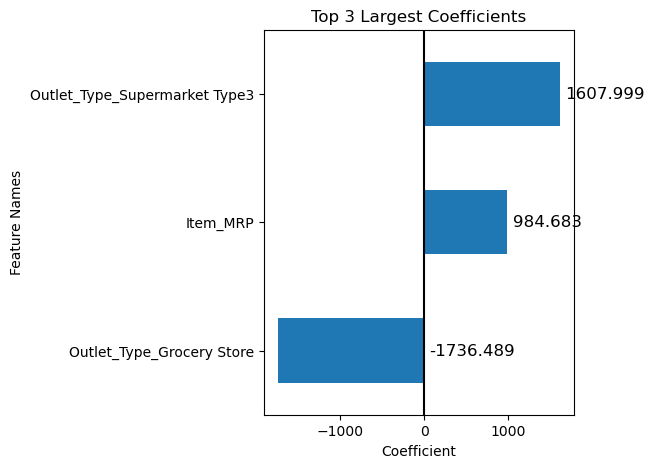

In [136]:
coeffs = get_coeffs_linreg(linreg)
plot_coeffs(coeffs,top_n=3,annotate=True);

plt.savefig('sine_wave.png')  # Saves the plot as a PNG file. You can choose different formats like PDF, SVG, etc.


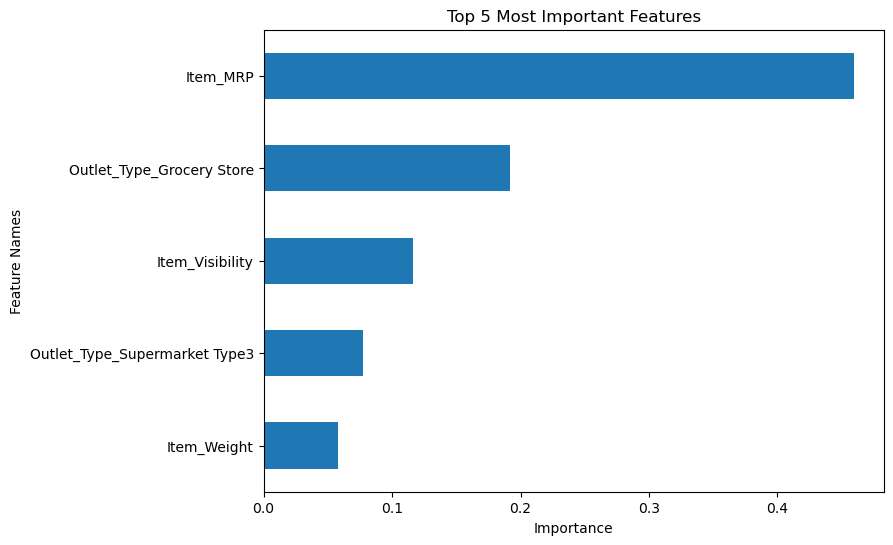

In [140]:
importances = get_importances(rf, sort=True, ascending=False)
plot_importance(importances, top_n=5);
plt.savefig('important_feature_RF.png')  # Saves the plot as a PNG file. You can choose different formats like PDF, SVG, etc.
